### 1. Read the dataset and check if anything missing

In [1]:
#import necessary modules to manipulate the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#read training and test sets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
#find nan values
print(np.sum(np.sum(train.isnull(), axis = 1)))
print(np.sum(np.sum(test.isnull(), axis = 1)))

0
0


Every sample is a 28*28 img

The first column "label" ranges from 0 to 9, which also should be the output value

No missing/NaN values in the datasets

In [6]:
#set features and labels
features = train.iloc[:, 1:]
label = train.iloc[:, 0]

### 2. Try DL / NN

How many processes do we need to build a NN algorithm?

    1. Activation Functions
    2. Initialization, normalization, and transpose dataset
    3. Convert muti-class labels into one hot code
    4. Initialize parameters
    5. Compute cost
    6. Set mini-batch size
    7. Build Forward-propagation process
    8. Build Back-propagation process
    9. Build Adam iteration process
    
    10. Run and compare the output (compute the cost)

### 2.1 Define Activation Function

In [7]:
#first, define sigmoid, relu, and tanh activation functions

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0, x)
    return s

def tanh(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- tanh(x)
    """
    s = np.tanh(x)
    return s

In [8]:
# Since we need to recognize the images of digits from 0 to 9, we need softmax activation function in the final layer

def softmax(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- softmax(x)
    """
    summation = np.sum(np.exp(x), axis = 0)
    s = np.exp(x) / summation
    return s

## 2.2 Initialization

Before implementing neural network, the data format should be adjusted first

In [9]:
#transform features and labels into numpy arrays
X_train_ori = train.iloc[:, 1:].values
Y_train_ori = train.iloc[:, 0].values
X_test_ori = test.values
X_train_ori.shape, Y_train_ori.shape

((42000, 784), (42000,))

In [10]:
#do the transpose and normalization
def feature_norm(x):
    '''
    Normalize the feature values of x
    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    X_norm -- normalized x.T
    '''
    X_norm = x.T
    X_norm = X_norm / 255
    return X_norm

In [11]:
X_norm = feature_norm(X_train_ori)
test_norm = feature_norm(X_test_ori)
X_norm.shape, test_norm.shape

((784, 42000), (784, 28000))

In [12]:
# Y (label) need to get transformed into one hot code
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [13]:
Y_norm = convert_to_one_hot(Y_train_ori, 10)
np.sum(Y_norm, axis = 1), Y_norm.shape

(array([ 4132.,  4684.,  4177.,  4351.,  4072.,  3795.,  4137.,  4401.,
         4063.,  4188.]), (10, 42000))

In [14]:
#set random seed for consistency
np.random.seed(32)

In [15]:
#compute first layer dim and last(10)
def first_dim(x):
    '''
    Compute the neuron number of the first layer
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    m -- x.shape[1]
    '''
    m = x.shape[0]
    return m

In [16]:
m = first_dim(X_norm)
print(m)

784


In [17]:
#build a n layers layer_dim
def set_layers(n, m, last_layer = 10):
    '''
    Set n layers for the neural network and decide how many neurons in each layer
    Arguments:
    n -- A constant to decide build how many hidden laysers

    Return:
    layer_dims -- a list consist of neuron numbers in each layer
    '''
    np.random.seed(32)
    layer_dims = []
    layer_dims.append(m)
    
    for i in range(n):
        layer_dims.append(np.random.randint(last_layer, m/(10*(i+1))))
    
    layer_dims.append(last_layer)
    return layer_dims

In [18]:
layer_dims = set_layers(2, m, last_layer = 10)
layer_dims

[784, 53, 15, 10]

In [19]:
#initailize parameters W, b with regularization
def initialize_parameters(layer_dims):
    '''
    Random initialization with Xavier Initialization
    '''
    #set random seed to keep consistency
    np.random.seed(32)
    #set dict to store parameters
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        #assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        #assert(parameters['b' + str(l)].shape == layer_dims[l], 1)
    
    return parameters

In [20]:
parameters = initialize_parameters(layer_dims)

## 2.3 Set Mini-batch Size and Build Forward and Back Propagation Process

In [21]:
# Mini-batch
def random_mini_batches(X, Y, mini_batch_size = 256, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- one hot vector , of shape (10, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    
    assert (shuffled_Y.shape == Y.shape)
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = m//mini_batch_size
    # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[: , k * mini_batch_size: (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[: , k * mini_batch_size: (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[: , mini_batch_size * num_complete_minibatches: m]
        mini_batch_Y = shuffled_Y[: , mini_batch_size * num_complete_minibatches: m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [22]:
# Forward Propagation
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
                    W4
                    b4
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    # retrieve parameters
    L = len(parameters) // 2
    cache = {}
    
    # LINEAR -> RELU -> ...... -> LINEAR -> SOFTMAX
    cache['z' + str(1)] = np.dot(parameters['W1'], X) + parameters['b1']
    cache['a' + str(1)] = relu(cache['z1'])
    cache['W1'] = parameters['W1']
    cache['b1'] = parameters['b1']
    for l in range(1, L-1):
        cache['z' + str(l+1)] = np.dot(parameters['W'+str(l+1)], cache['a'+str(l)]) + parameters['b'+str(l+1)]
        cache['a'+str(l+1)] = relu(cache['z' + str(l+1)])
        cache['W'+str(l+1)] = parameters['W'+str(l+1)]
        cache['b'+str(l+1)] = parameters['b'+str(l+1)]
    
    cache['z'+str(L)] = np.dot(parameters['W'+str(L)], cache['a'+str(L-1)]) + parameters['b'+str(L)]
    cache['a'+str(L)] = softmax(cache['z' + str(L)])
    cache['W'+str(L)] = parameters['W'+str(L)]
    cache['b'+str(L)] = parameters['b'+str(L)]
    
    
    return cache['a'+str(L)], cache


In [23]:
#build cost function
def compute_cost(aL, Y):
    
    """
    Implement the cost function
    
    Arguments:
    aL -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as aL (10 * m)
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    cost = -1 / m * np.sum(np.sum(np.multiply(Y, np.log(aL)), axis = 0))
    
    return cost

In [24]:
#softmax derivative: 
#https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- one hot matrix for multi-class labels 
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    L = len(cache) // 4
    m = X.shape[1]
    
    gradients = {}
    
    gradients['dz' + str(L)] = 1./m * (cache['a'+str(L)] - Y)
    gradients['dW' + str(L)] = np.dot(gradients['dz' + str(L)], cache['a'+str(L-1)].T)
    gradients['db' + str(L)] = np.sum(gradients['dz' + str(L)], axis=1, keepdims = True)
    
    for l in range(L-1, 1, -1):
        gradients['da' + str(l)] = np.dot(cache['W'+str(l+1)].T, gradients['dz'+str(l+1)])
        gradients['dz' + str(l)] = np.multiply(gradients['da' + str(l)], np.int64(cache['a'+str(l)] > 0))
        gradients['dW' + str(l)] = np.dot(gradients['dz' + str(l)], cache['a'+str(l-1)].T)
        gradients['db' + str(l)] = np.sum(gradients['dz' + str(l)], axis=1, keepdims = True)
        
    gradients['da1'] = np.dot(cache['W2'].T, gradients['dz2'])
    gradients['dz1'] = np.multiply(gradients['da1'], np.int64(cache['a1'] > 0))
    gradients['dW1'] = np.dot(gradients['dz1'], X.T)
    gradients['db1'] = np.sum(gradients['dz1'], axis=1, keepdims = True)
    
    return gradients

## 2.4 Setting Adam algorithm for optimization

In [25]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    ### END CODE HERE ###
    
    return v, s

In [26]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1 ** t)
        # You can't repeat the formula again since the value of v["dW" + str(l+1)] has been changed!
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1-beta2) * np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1-beta2) * np.square(grads['db' + str(l+1)])
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1- beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1- beta2 ** t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (
            np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (
            np.sqrt(s_corrected["db" + str(l+1)])  + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [55]:
def model(X, Y, layers_dims, optimizer = 'adam', learning_rate = 0.0005, mini_batch_size = 256, beta = 0.9,
          learning_decay = 0.001,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 300, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            aL, cache = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(aL, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, cache)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 10 == 0:
            print ("Cost after epoch %i: %f" %(i, np.log10(cost)))
            
        if print_cost and i % 1 == 0:
            costs.append(cost)
        if np.log10(cost) <= -9 : break
        learning_rate = learning_rate / (1+learning_decay)
        
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.yscale('log')
    plt.xlabel('epochs (per 1)')
    plt.title("Learning rate = " + str(learning_rate) + ', ' + 'mini_batch_size = ' + str(mini_batch_size))
    plt.show()
    print(np.log10(cost))

    return parameters

## 2.5 Run NN!

In [29]:
train_X = feature_norm(X_train_ori)
train_Y = convert_to_one_hot(Y_train_ori, 10)
layer_dims = set_layers(2, m, last_layer = 10)

Cost after epoch 0: -0.291869
Cost after epoch 5: -0.840116
Cost after epoch 10: -1.653996
Cost after epoch 15: -1.583006
Cost after epoch 20: -0.997760
Cost after epoch 25: -1.605430
Cost after epoch 30: -0.790655
Cost after epoch 35: -1.101237
Cost after epoch 40: -2.684082
Cost after epoch 45: -2.180637
Cost after epoch 50: -2.943441
Cost after epoch 55: -2.293636
Cost after epoch 60: -1.414708
Cost after epoch 65: -2.839716
Cost after epoch 70: -2.643849
Cost after epoch 75: -1.828597
Cost after epoch 80: -2.827000
Cost after epoch 85: -1.800365
Cost after epoch 90: -2.328446
Cost after epoch 95: -2.305395
Cost after epoch 100: -3.794804
Cost after epoch 105: -3.347502
Cost after epoch 110: -3.712320
Cost after epoch 115: -3.218968
Cost after epoch 120: -3.168510
Cost after epoch 125: -2.744853
Cost after epoch 130: -3.528053
Cost after epoch 135: -2.297519
Cost after epoch 140: -4.411059
Cost after epoch 145: -3.531940
Cost after epoch 150: -3.063444
Cost after epoch 155: -5.33312

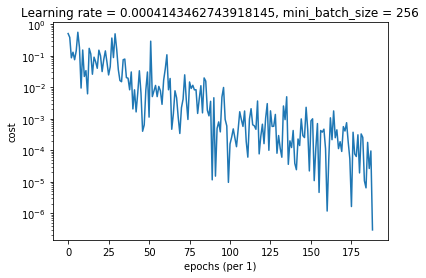

-6.5232393926


In [47]:
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam")
#0.964

Cost after epoch 0: -1.195056
Cost after epoch 5: -1.032704
Cost after epoch 10: -1.244826
Cost after epoch 15: -1.192274
Cost after epoch 20: -1.991398
Cost after epoch 25: -2.634461
Cost after epoch 30: -0.854925
Cost after epoch 35: -3.298017
Cost after epoch 40: -4.917964
Cost after epoch 45: -4.300720
Cost after epoch 50: -5.222173
Cost after epoch 55: -4.409770
Cost after epoch 60: -5.469942
Cost after epoch 65: -4.286403
Cost after epoch 70: -6.491279
Cost after epoch 75: -2.559102
Cost after epoch 80: -6.134603
Cost after epoch 85: -3.654029
Cost after epoch 90: -6.001056
Cost after epoch 95: -4.892482


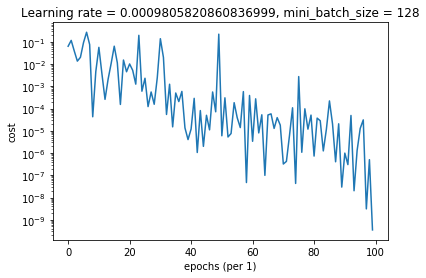

-9.45552352893


In [57]:
parameters = model(train_X, train_Y, layer_dims, optimizer = 'adam', learning_rate = 0.00253, 
                   learning_decay = 0.00962,
                   mini_batch_size = 128, beta = 0.9, beta1 = 0.92, beta2 = 0.999,  
                   epsilon = 1e-8, num_epochs = 300, print_cost = True)
#0.96857

Cost after epoch 0: -1.195061
Cost after epoch 5: -1.110771
Cost after epoch 10: -2.094027
Cost after epoch 15: -2.233369
Cost after epoch 20: -1.202261
Cost after epoch 25: -3.314280
Cost after epoch 30: -3.660486
Cost after epoch 35: -2.968145
Cost after epoch 40: -5.140485
Cost after epoch 45: -4.577657
Cost after epoch 50: -4.795420
Cost after epoch 55: -4.582444
Cost after epoch 60: -4.677801
Cost after epoch 65: -6.242573
Cost after epoch 70: -5.461031
Cost after epoch 75: -4.759324
Cost after epoch 80: -5.567504
Cost after epoch 85: -3.220391
Cost after epoch 90: -4.275762
Cost after epoch 95: -4.931747


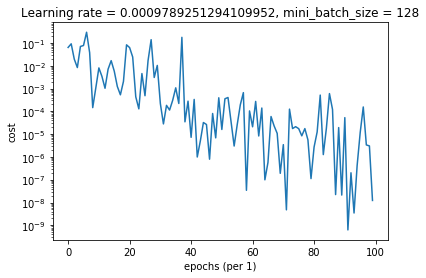

-7.90973020004


In [199]:
parameters = model(train_X, train_Y, layer_dims, optimizer = 'adam', learning_rate = 0.00250, 
                   learning_decay = 0.00942,
                   mini_batch_size = 128, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  
                   epsilon = 1e-8, num_epochs = 100, print_cost = True)

#0.97057

## 2.6 Make Prediction

In [58]:
Y_hat, _ = forward_propagation(test_norm, parameters)
Y_hat.shape

(10, 28000)

In [59]:
prediction = np.argmax(Y_hat.T, axis = 1)

In [60]:
#print it out!
output = pd.DataFrame(prediction, columns = ['Label']).reset_index()
output.rename(columns = {'index': 'ImageId'}, inplace = True)
output.iloc[:, 0] += 1
output.to_csv('DL_adam.csv', index = False)
#0.97014